In [34]:
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
diabetes = load_diabetes()

print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [8]:
X = diabetes.data
y = diabetes.target

In [11]:
df = pd.DataFrame(X)
df.columns = diabetes.feature_names

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


#### Normalize Data

In [12]:
u = np.mean(X, axis=0)
std = np.std(X, axis=0)

print(u.shape, std.shape)

(10,) (10,)


In [13]:
X = (X - u) / std

pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9
0,0.800500,1.065488,1.297088,0.459840,-0.929746,-0.732065,-0.912451,-0.054499,0.418551,-0.370989
1,-0.039567,-0.938537,-1.082180,-0.553511,-0.177624,-0.402886,1.564414,-0.830301,-1.436551,-1.938479
2,1.793307,1.065488,0.934533,-0.119218,-0.958674,-0.718897,-0.680245,-0.054499,0.060207,-0.545154
3,-1.872441,-0.938537,-0.243771,-0.770658,0.256292,0.525397,-0.757647,0.721302,0.477072,-0.196823
4,0.113172,-0.938537,-0.764944,0.459840,0.082726,0.327890,0.171178,-0.054499,-0.672582,-0.980568


In [ ]:
# Initialize theta
# Update 

In [31]:
def hypothesis(X, theta):
    return np.dot(X, theta)

def error(X, y, theta):
    m = X.shape[0]
    y_ = hypothesis(X, theta)
    e = np.sum((y_ - y)**2)
    return e / m

def gradient(X, y, theta):
    m = X.shape[0]
    y_ = hypothesis(X, theta)
    grad = np.dot(X.T, (y_ - y))
    return grad/m

def R2_score(y_, y):
    num = np.sum((y - y_)**2)
    den = np.sum((y - y.mean())**2)
    score = (1 - num/den)
    return score*100

def gradient_descent(X, y, lr=0.1, max_iter=100):
    ones = np.ones((X.shape[0], 1))
    X = np.hstack((ones,X))
    
    m, n = X.shape
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_iter):
        error_list.append(error(X, y, theta))
        
        grad = gradient(X, y, theta)
        theta = theta - lr * grad
    
    y_ = hypothesis(X, theta)
    print("R2 Score: ", R2_score(y_, y))
    
    return theta, error_list

In [41]:
theta, error_list = gradient_descent(X, y, lr=0.0001, max_iter=20000)

In [42]:
theta

array([131.54651493,   0.49216799,  -8.84312567,  22.61379355,
        14.12840642,  -1.75028004,  -4.75909848,  -9.80355243,
         6.18255621,  18.84368266,   5.84830842])

In [43]:
error_list

[29074.481900452487,
 29068.123298477996,
 29061.766864070618,
 29055.412596078775,
 29049.0604933517,
 29042.710554739424,
 29036.362779092782,
 29030.01716526343,
 29023.673712103817,
 29017.332418467202,
 29010.993283207637,
 29004.656305179986,
 28998.321483239914,
 28991.988816243887,
 28985.65830304917,
 28979.329942513825,
 28973.00373349672,
 28966.67967485753,
 28960.357765456705,
 28954.03800415551,
 28947.720389816008,
 28941.40492130106,
 28935.091597474304,
 28928.780417200185,
 28922.47137934396,
 28916.164482771652,
 28909.85972635009,
 28903.557108946905,
 28897.2566294305,
 28890.958286670088,
 28884.662079535665,
 28878.368006898014,
 28872.07606762872,
 28865.786260600147,
 28859.49858468544,
 28853.213038758553,
 28846.92962169421,
 28840.648332367935,
 28834.369169656024,
 28828.09213243557,
 28821.817219584445,
 28815.544429981306,
 28809.2737625056,
 28803.00521603754,
 28796.73878945815,
 28790.47448164921,
 28784.212291493295,
 28777.952217873746,
 28771.694259

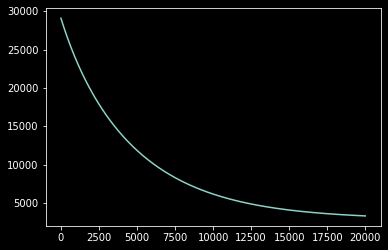

In [44]:
plt.plot(error_list)
plt.show()

In [ ]:
y_ = 

R2_score